# Introduction to Python and Google Colabratory

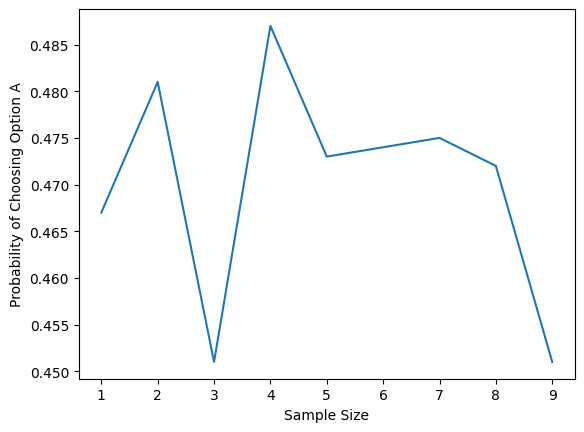

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

df = pd.DataFrame([], columns=["Sample Size", "Probability of Choosing Option A"])

option_1_history = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
option_2_history = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for sample_size in range(1,10):
  time_choosing_option_1 = 0
  samples = 1000
  for _ in range(samples):
    option_1_sample = random.sample(option_1_history, sample_size)
    option_2_sample = random.sample(option_2_history, sample_size)
    option_1_sample_mean = np.mean(option_1_sample)
    option_2_sample_mean = np.mean(option_2_sample)

    if(option_1_sample_mean > option_2_sample_mean):
      time_choosing_option_1 += 1

  probability_choosing_option_1 = time_choosing_option_1 / samples
  d = pd.DataFrame([[sample_size, probability_choosing_option_1]], columns=["Sample Size", "Probability of Choosing Option A"])
  df = pd.concat([df, d], ignore_index=True)

sns.lineplot(data=df, x="Sample Size", y="Probability of Choosing Option A") # Graph the results on a line plot
plt.show()

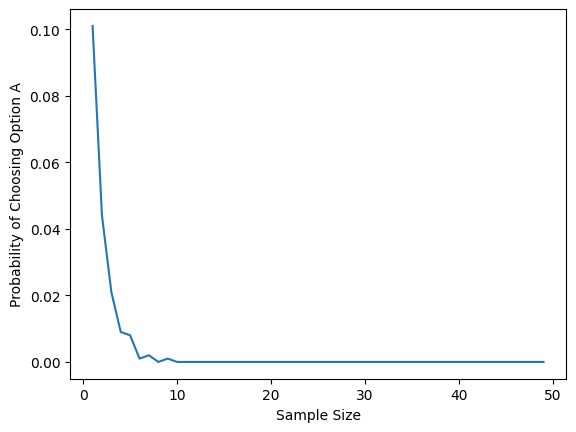

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

df = pd.DataFrame([], columns=["Sample Size", "Probability of Choosing Option A"])

option_1_history = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
option_2_history = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for sample_size in range(1,50):
  time_choosing_option_1 = 0
  samples = 1000
  for _ in range(samples):
    probability_of_retrieval = np.array([0.025, 0.025, 0.025, 0.05, 0.05, 0.075, 0.1, 0.2, 0.25, 0.2])

    option_1_sample = []
    option_2_sample = []
    option_1_sample = np.random.choice(a=option_1_history, size=sample_size, p=probability_of_retrieval)
    option_2_sample = np.random.choice(a=option_2_history, size=sample_size, p=probability_of_retrieval)
    option_1_sample_mean = np.mean(option_1_sample)
    option_2_sample_mean = np.mean(option_2_sample)

    if(option_1_sample_mean > option_2_sample_mean):
      time_choosing_option_1 += 1

  probability_choosing_option_1 = time_choosing_option_1 / samples
  d = pd.DataFrame([[sample_size, probability_choosing_option_1]], columns=["Sample Size", "Probability of Choosing Option A"])
  df = pd.concat([df, d], ignore_index=True)

sns.lineplot(data=df, x="Sample Size", y="Probability of Choosing Option A") # Graph the results on a line plot
plt.show()

<Axes: xlabel='Timestep', ylabel='Reward'>

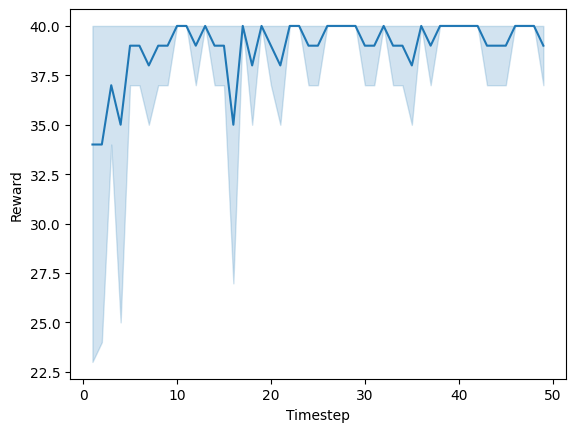

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

df = pd.DataFrame([], columns=["Reward", "Timestep"])

# True values:
# Red = +20
# Blue = -10
# Square = +20
# Circle = 0

red_value_history = [-10]
blue_value_history = [10]

square_value_history = [-10]
circle_value_history = [10]

option_pairs = [["Blue-Square", "Red-Square"], ["Red-Square", "Blue-Circle"], ["Red-Square", "Red-Circle"]]

for _ in range(10):
  for timestep in range(1,50):
    #if(timestep > 20): assert(False)
    np.random.shuffle(option_pairs)
    current_options = option_pairs[0]
    left_option = current_options[0]
    right_option = current_options[1]

    choices = [left_option, right_option]
    values = []
    for choice in choices:
      value = 0
      if("Blue" in choice):
        value += np.mean(blue_value_history)
      if("Red" in choice):
        value += np.mean(red_value_history)
      if("Square" in choice):
        value += np.mean(square_value_history)
      if("Circle" in choice):
        value += np.mean(circle_value_history)
      values.append(value / 2)

    #print(values)
    values = np.array(values) / 5
    action_distribution = np.exp(values)/sum(np.exp(values))
    #print(action_distribution)
    chosen = np.random.choice(choices, p=action_distribution)
    #print(chosen)

    reward = 0
    if("Blue" in chosen):
      reward += -20
    if("Red" in chosen):
      reward += 20
    if("Square" in chosen):
      reward += 20
    if("Circle" in chosen):
      reward += 10

    if("Blue" in chosen):
      blue_value_history.append(reward)
    if("Red" in chosen):
      red_value_history.append(reward)
    if("Square" in chosen):
      square_value_history.append(reward)
    if("Circle" in chosen):
      circle_value_history.append(reward)

    d = pd.DataFrame([[reward, timestep]], columns=["Reward", "Timestep"])
    df = pd.concat([df, d], ignore_index=True)

sns.lineplot(data=df, x="Timestep", y="Reward") # Graph the results on a line plot
#plt.show()